In [41]:
# https://wikidocs.net/64517

# 1. 자연어 처리 전처리 이해하기
---

자연어 처리는 일반적으로 토큰화 / 단어 집합 생성 / 정수 인코딩 / 패딩 / 벡터화의 과정을 거친다.  

In [42]:
# 1. 토큰화(Tokenization)
# 주어진 텍스트를 단어 또는 문자 단위로 자르는 것을 토큰화라 한다.  
# 영어의 경우 토큰화를 사용하는 도구로 대표적으로 spaCy와 NLTK가 있다.

In [43]:
# 우선 영어 문장으로 진행해보자
en_text = 'A Dog Run back corner near spare bedrooms'

## spaCy 사용하기
---

In [44]:
import spacy
spacy_en = spacy.load("en_core_web_sm")

In [45]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [46]:
print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


## NLTK 사용하기 (Natural Language Toolkit)
---

In [47]:
!pip install nltk

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lemon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


## 띄어쓰기로 토큰화
---
영어니까 가능한거 아닌냑고 ㅠ

In [50]:
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [51]:
# 하지만 한국어는 조사, 접사 등으로 단순 띄어쓰기 단위로 나누면 같은 단어도 다른 단어로 인식된다
# 따라서 단어집합(vocabulary)의 크기가 불필요하게 커지게

# 한국어도 띄어쓰기 기준 토큰화를 해서 비교해보자
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split(' '))

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


## 형태소 토큰화
---


In [52]:
# 위와 같은 상황을 방지하기 위해서 한국어는 보편적으로 '형태소 분석기'로 토큰화를 사용한다.

In [53]:
from eunjeon import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


## 문자 토큰화
---

In [54]:
print(list(en_text))

['A', ' ', 'D', 'o', 'g', ' ', 'R', 'u', 'n', ' ', 'b', 'a', 'c', 'k', ' ', 'c', 'o', 'r', 'n', 'e', 'r', ' ', 'n', 'e', 'a', 'r', ' ', 's', 'p', 'a', 'r', 'e', ' ', 'b', 'e', 'd', 'r', 'o', 'o', 'm', 's']


# 2. 단어 집합(Vocabulary) 생성
---

중복을 제거한 텍스트의 총 단어의 집합(set)인 vocabulary를 만들자  
실습을 위해 깃허브에서 '네이버 영화 리뷰 분류하기'를 다운  
20만개 영화 리뷰를 긍정1, 부정0으로 레이블링한 데이터  

In [55]:
import urllib.request
import pandas as pd
from eunjeon import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [56]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename = 'ratings.txt')
data = pd.read_table('ratings.txt') # df에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [57]:
print('전체 샘플의 수: {}'.format(len(data)))

전체 샘플의 수: 200000


In [58]:
sample_data = data[:100]    # 임의로 100개만 샘플 데이터로 지정

In [59]:
# 정규 표현식을 통해서 데이터를 정제
# 한글과 공백을 제외하고 모두 제거
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
sample_data[:10]

C:\Users\lemon\AppData\Local\Temp/ipykernel_15888/1103236430.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
C:\Users\lemon\AppData\Local\Temp/ipykernel_15888/1103236430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")


,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1
5,2190435,사랑을해본사람이라면처음부터끝까지웃을수있는영화,1
6,9279041,완전감동입니다다시봐도감동,1
7,7865729,개들의전쟁나오나요나오면빠로보고싶음,1
8,7477618,굿,1
9,9250537,바보가아니라병쉰인듯,1


In [60]:
# 불용어를 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [61]:
tokenizer = Mecab()

In [62]:
tokenized = []
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence)   # 토큰화 먼저
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

In [63]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [64]:
# 단어 집합을 만들자
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기: {}'.format(len(vocab)))

단어 집합의 크기: 654


In [65]:
# 단어를 key로 / 단어에 대한 빈도수가 value로 저장되어있는데,
# vocab에 단어를 입력하면 빈도수를 반환한다.
vocab['재밌']

8

In [66]:
# vocab.most_common(n)을 이용해 상위 빈도수 n개만 반환하여 사용하자
vocab_size = 500
# 상위 500개만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기: {}'.format(len(vocab)))

단어 집합의 크기: 500


# 3. 각 단어에 고유한 정수 부여
---

In [70]:
# enumerate()를 이용해 index 0은 nuk로 index 1은 pad로 지정하고 나머지는 순차적으로 인덱스를 부여
# 문장의 길이를 맞추기 위한 ‘[PAD]’
# 없는 글자를 처리하기 위한 ‘[UNK]’

In [74]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [75]:
len(word_to_index)  # 이렇게 하면 2개 추가하여 502개

502

In [76]:
encoded = []
for line in tokenized:  # 입력 데이터에서 1줄씩 문장을 읽음
    temp = []       
    for w in line:  # 각 줄에서 1개씩 글자 읽기
        try:
            temp.append(word_to_index[w])   # 글자를 해당되는 정수롤 변환
        except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체
            temp.append(word_to_index['unk'])
    encoded.append(temp)

In [77]:
print(encoded[:10])

[[78, 25, 8, 4, 47, 39, 79, 22, 26, 80], [186, 5, 81, 187, 188, 189, 48, 190, 111, 5, 191, 192, 23, 112, 193, 194, 12, 49, 82, 113, 27, 48, 195, 114, 115, 28, 196, 5, 197, 198, 14, 111, 7, 63, 50, 14, 40, 199, 5, 200, 4, 201, 15, 7, 83, 41, 202, 84], [203, 116, 204, 51, 205, 28, 206, 207, 85, 13, 29, 10], [52, 30, 117, 208, 209, 210, 211, 64, 31, 32, 12, 212, 118, 16, 2, 213, 65, 9, 30, 3, 33], [214, 215, 216, 217, 7, 218, 14, 3], [119, 5, 23, 34, 40, 120, 121, 51, 115, 28, 86, 5, 15, 7, 3], [122, 35, 219, 39, 79, 35], [117, 220, 53, 221, 53, 66, 222, 36, 8, 4, 42, 29], [54], [223, 87, 88, 224, 225, 55, 89]]


# 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)
---

리뷰의 최대 길이: 62
리뷰의 최소 길이: 1
리뷰의 평균 길이: 13


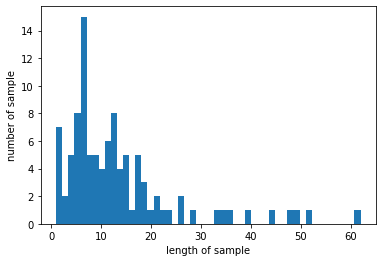

In [83]:
max_len = max(len(l) for l in encoded)
min_len = min(len(l) for l in encoded)

print('리뷰의 최대 길이: %d' % max_len)
print('리뷰의 최소 길이: %d' % min_len)
print('리뷰의 평균 길이: %d' % (sum(map(len, encoded))/len(encoded)))

plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [84]:
# 최대 길이 62로 패딩해주자
for line in encoded:
    if len(line) < max_len :
        line += [word_to_index['pad']] * (max_len - len(line))  # 나머지는 전부 pad 토큰으로 채운다
        # 이 경우는 padding이 뒤에 붙는다

In [86]:
# 잘 되었는지 확인
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

# 상위 3개 샘플 확인
print(encoded[:3])

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 62
리뷰의 평균 길이 : 62.000000
[[78, 25, 8, 4, 47, 39, 79, 22, 26, 80, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [186, 5, 81, 187, 188, 189, 48, 190, 111, 5, 191, 192, 23, 112, 193, 194, 12, 49, 82, 113, 27, 48, 195, 114, 115, 28, 196, 5, 197, 198, 14, 111, 7, 63, 50, 14, 40, 199, 5, 200, 4, 201, 15, 7, 83, 41, 202, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [203, 116, 204, 51, 205, 28, 206, 207, 85, 13, 29, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
